# Air Pollution and GDP

Elements of Data Science

by [Allen Downey](https://allendowney.com)

[MIT License](https://opensource.org/licenses/MIT)

## Air Pollution and GDP

This example is based on [an interactive visualization from Our World in Data](https://ourworldindata.org/outdoor-air-pollution).

They make the data available for download (thank you!).  I have stored a copy in this repository; the following cell downloads it if necessary.

In [1]:
# Get the data file

import os

filename = 'outdoor-pollution-rate-vs-gdp.csv'
if not os.path.exists(filename):
    !wget https://github.com/AllenDowney/ElementsOfDataScience/raw/master/data/outdoor-pollution-rate-vs-gdp.csv

Now we can read the data into a Pandas `DataFrame`.

In [2]:
import pandas as pd

df = pd.read_csv(filename)
df.head()

,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)",Continent,"GDP per capita, PPP (constant 2011 international $)",Death rate – Outdoor air pollution (age-standardized) (IHME)
0,Abkhazia,OWID_ABK,2015,NaN,Asia,NaN,NaN
1,Afghanistan,AFG,1800,3280000.0,NaN,NaN,NaN
2,Afghanistan,AFG,1801,3280000.0,NaN,NaN,NaN
3,Afghanistan,AFG,1802,3280000.0,NaN,NaN,NaN
4,Afghanistan,AFG,1803,3280000.0,NaN,NaN,NaN


In [3]:
df.columns

Index(['Entity', 'Code', 'Year', 'Total population (Gapminder, HYDE & UN)',
       'Continent', 'GDP per capita, PPP (constant 2011 international $)',
       'Death rate – Outdoor air pollution (age-standardized) (IHME)'],
      dtype='object')

In [4]:
df['Entity'].value_counts()

Switzerland                                     220
Tunisia                                         220
Cote d'Ivoire                                   220
Egypt                                           220
Sri Lanka                                       220
                                               ... 
South Georgia and the South Sandwich Islands      1
Guernsey                                          1
Cocos Islands                                     1
East Germany                                      1
Baden                                             1
Name: Entity, Length: 368, dtype: int64

In [5]:
df['GDP per capita, PPP (constant 2011 international $)'].describe()

count      6407.000000
mean      14926.095591
std       17739.754531
min         247.436540
25%        3021.071807
50%        8447.264179
75%       19607.537075
max      135318.754421
Name: GDP per capita, PPP (constant 2011 international $), dtype: float64

In [6]:
df['Death rate – Outdoor air pollution (age-standardized) (IHME)'].describe()

count    6467.000000
mean       38.483708
std        19.921586
min         8.330000
25%        23.875000
50%        33.590000
75%        49.355000
max       143.350000
Name: Death rate – Outdoor air pollution (age-standardized) (IHME), dtype: float64

In [7]:
is_country = ~df['Code'].str.startswith('OWID').astype(bool)

In [8]:
is_2017 = df['Year'] == 2017

In [9]:
df17 = df[is_2017 & is_country]

In [10]:
gdp = df17['GDP per capita, PPP (constant 2011 international $)']

In [11]:
death_rate = df17['Death rate – Outdoor air pollution (age-standardized) (IHME)']

In [12]:
pop = df17['Total population (Gapminder, HYDE & UN)'] / 1e6
pop.describe()

count     233.000000
mean       32.393468
std       132.694933
min         0.001000
25%         0.424000
50%         5.448000
75%        19.654000
max      1421.021952
Name: Total population (Gapminder, HYDE & UN), dtype: float64

[How to make a bubble plot in Matplotlib](https://www.google.com/search?q=matplotlib+bubble+chart)

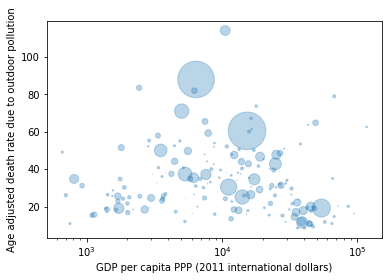

In [13]:
import matplotlib.pyplot as plt

plt.scatter(gdp, death_rate, s=pop, alpha=0.3)
plt.xscale('log')

plt.xlabel('GDP per capita PPP (2011 international dollars)')
plt.ylabel('Age adjusted death rate due to outdoor pollution');

In [14]:
s = pd.Series(pop.values, index=df17['Entity'])
s.describe()

count     233.000000
mean       32.393468
std       132.694933
min         0.001000
25%         0.424000
50%         5.448000
75%        19.654000
max      1421.021952
dtype: float64

In [15]:
s.nlargest(10)

Entity
China            1421.021952
India            1338.676992
United States     325.084992
Indonesia         264.651008
Pakistan          207.906000
Brazil            207.834000
Nigeria           190.872992
Bangladesh        159.684992
Russia            145.530000
Japan             127.503000
dtype: float64

In [16]:
s.nsmallest(10)

Entity
Tokelau                      0.001
Vatican                      0.001
Niue                         0.002
Falkland Islands             0.003
Montserrat                   0.005
Saint Helena                 0.006
Saint Pierre and Miquelon    0.006
Nauru                        0.011
Tuvalu                       0.011
Wallis and Futuna            0.012
dtype: float64